In [2]:
import os
os.environ['R_HOME'] = 'C:/Users/omkar.joglekar/Anaconda3/Lib/R-4.3.1' #path to your R installation

# Welcome to the GeoLift walkthrough in Python

This is a completed GeoLift single and multicell walkthrough in Python.


## Installation

Please check the README.md file for more details on how installing packages and setting up Python environment.


## Please read it before starting running this GeoLift walkthrough in Python

To run the R `GeoLift` functions in Python, you need to add `GeoLift.` in front of it as in `GeoLift.GeoLiftMarketSelection` for example.

There are 3 functions in Python under `utils.py`. For more details please run `help()` with the name of one the three function below as parameter, e.g. `help(ConvertDf)`: 

    - `GeoLiftData`: Load and return the dataset included in the GeoLift package. 

    - `GeoLiftPlot`: Receive a specific GeoLift Plot function (defined by the `func` parameter), its arguments and display the plot.

    - `ConvertDf`: Convert R dataframe into Pandas if `conv_type = "ToPandas"` or convert Pandas dataframe into R if `conv_type = "ToR"`.


To understand the paraments of a specfic R GeoLift function:
- you can check the R versions:

    - [GeoLift Walkthrough](https://facebookincubator.github.io/GeoLift/docs/GettingStarted/Walkthrough) to understand the main parameters used by the GeoLift Single-cell functions 
    - [GeoLift Multi-Cell Walkthough](https://facebookincubator.github.io/GeoLift/docs/GettingStarted/MultiCellWalkthrough) to understand the main parameters used by the GeoLift Multicell functions.


- or you case use the command `print(r.help("name of the function in R"))` without `GeoLift.`. See the following command examples: `print(r.help("GeoDataRead"))`, `print(r.help("GeoLiftMarketSelection"))`.

For vectors as input, you need to specify if it's a vector of list (defined by `ListVector`), vector of integers (`IntVector`) or vector of strings (`StrVector`). These are the equivalent of `c()` in R.

For creating a sequence of numbers as input, use `r.seq()`. This is the equivalent of `seq()` in R.

It's recommended to input only rpy2 or R objects in the GeoLift functions to run it properly.

Load libraries

In [24]:
#To import rpy2 objects
from rpy2.robjects import packages, StrVector, IntVector, ListVector, r
from rpy2.robjects.packages import importr

import pandas as pd

#Import GeoLift, GeoLiftPlot and Convert functions
from utils import GeoLiftData, GeoLift, GeoLiftPlot, ConvertDf

# GeoLift Single cell 

## Example - Data

To show an end-to-end implementation of GeoLift we will use simulated data of 40 US cities across 90 days to: design a test, select test markets, run power calculations, and finally calculate the Lift caused by the campaign. As with every GeoLift test, we start analyzing pre-test historical information. We will use the data included in the GeoLiftPython folder.



In [4]:
pd_GeoLift_PreTest = pd.read_csv("GeoLift_PreTest.csv")
pd_GeoLift_PreTest.head()

,location,Y,date
0,new york,3300,2021-01-01
1,new york,3202,2021-01-02
2,new york,4138,2021-01-03
3,new york,3716,2021-01-04
4,new york,3270,2021-01-05


The GeoLift_PreTest data set contains three variables:

1. location (city)
2. date (in “yyyy-mm-dd” format)
3. Y (number of conversions/KPI in each day/location).

Every GeoLift experiment should contain at least these three variables that reflect when, where, and how much of the KPI was measured. Nevertheless, if you have more data available, you can include covariates to GeoLift to improve our results through the X parameter of all GeoLift functions.

To input the dataset in the GeoLift functions you need to convert it to a R dataframe using `ConvertDf()` setting up the `conv_type = "ToR"`. Then you can use `print()` to print the R dataframe in the screen.

In [5]:
GeoLift_PreTest = ConvertDf(pd_GeoLift_PreTest, conv_type = "ToR")

print(GeoLift_PreTest.head())

  location    Y       date
0 new york 3300 2021-01-01
1 new york 3202 2021-01-02
2 new york 4138 2021-01-03
3 new york 3716 2021-01-04
4 new york 3270 2021-01-05
5 new york 3260 2021-01-06



The first step to run a GeoLift test is to read the data into the proper format using the GeoDataRead function.

In [6]:
GeoTestData_PreTest = GeoLift.GeoDataRead(data = GeoLift_PreTest,
                                          date_id = "date",
                                          location_id = "location",
                                          Y_id = "Y",
                                          X = StrVector([]), #empty list as we have no covariates
                                          format = "yyyy-mm-dd",
                                          summary = True)

R[write to console]: ##################################
#####       Summary       #####
##################################

* Raw Number of Locations: 40
* Time Periods: 90
* Final Number of Locations (Complete): 40



This function analyzes the data set, handles locations with missing data, and returns a R data frame with time-stamps instead of dates. In this case, since we’re inputting daily data each time unit represents a day.

Note: Before reading the data into this format, always make sure that there are no missing variables, NAs, or locations with missing time-stamps as those will be dropped by the `GeoLift.GeoDataRead()` function.

You can visualize in Pandas the dataframe formatted using `ConvertDf()`.

In [7]:
pd_GeoTestData_PreTest = ConvertDf(GeoTestData_PreTest, conv_type = "ToPandas")

pd_GeoTestData_PreTest.head()

,location,time,Y
1,atlanta,1,3384
2,atlanta,2,3904
3,atlanta,3,5734
4,atlanta,4,4311
5,atlanta,5,3686


A good next step is to plot the panel data with `GeoPlot()` setting up the partamer `func = GeoLift.GeoPlot` to observe it’s trend, contribution per location, and also to detect any data anomalies before moving on to the data analysis. grdevices.render_to_bytesion, display and Image functions are used in combination to plot and display charts.

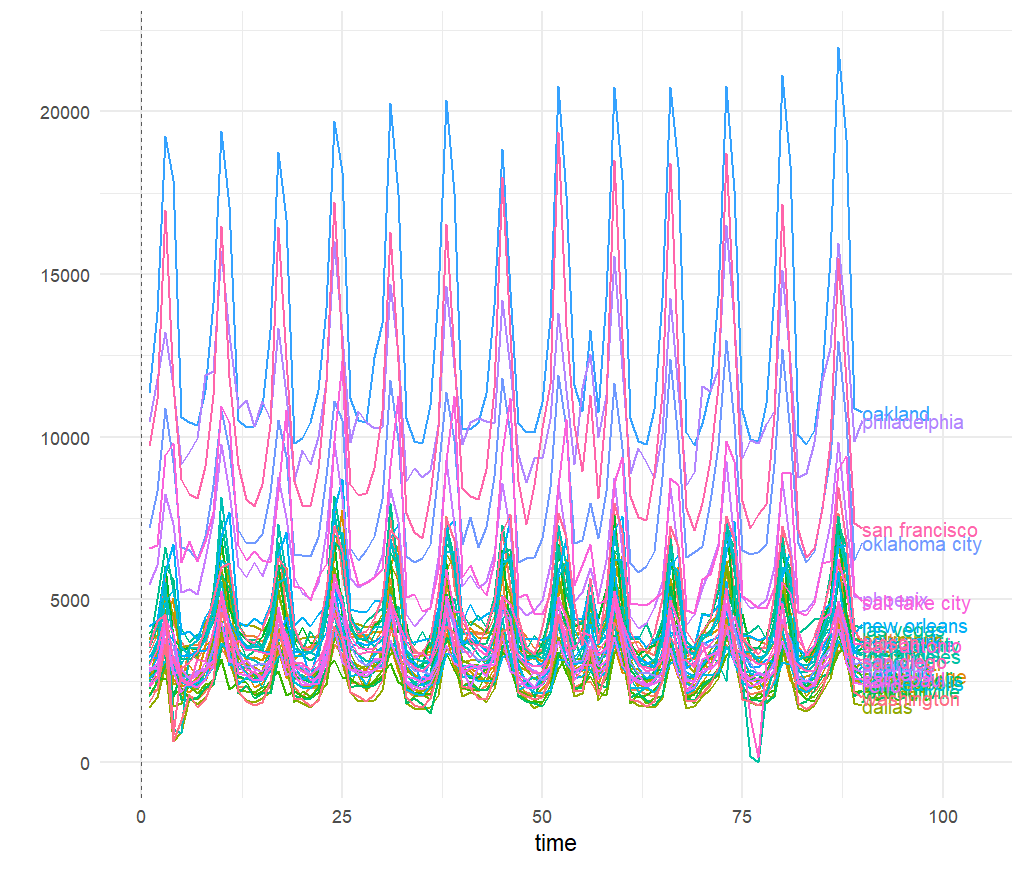

In [25]:
GeoLiftPlot(func = GeoLift.GeoPlot,
            data = GeoTestData_PreTest,
            Y_id = "Y",
            time_id = "time",
            location_id = "location")

In this case we see a similar pattern that’s shared across all locations. These structural similarities between regions are the key to a successful test!

## Example - Power Analysis

Running a prospective power analysis is fundamental prior to executing a test. It is only through a thorough statistical analysis of our data that we can set it up for success. In general, through the power analysis we can find:

- The optimal number of test locations.

- Best test duration.

- Select the ideal test and control markets.

- Get a good estimate of the budget needed to run the test.

- Determine which is the Minimum Detectable Effect to obtain significant results.

- Align expectations.

Assessing the power and selecting the test markets for a GeoLift test can be accomplished through the `GeoLiftMarketSelection()`. Through a series of simulations, this algorithm will find which are the best combinations of test and control locations for the experiment. Moreover, for each of these test market selections, the function will display the Minimum Detectable Effect, minimum investment needed to run a successful test, and other important model-fit metrics that will help us select the test that best matches our goals and resources.

To understand the main parameters in the `GeoLiftMarketSelection()` please check the [GeoLift Walkthrough](https://facebookincubator.github.io/GeoLift/docs/GettingStarted/Walkthrough).

Continuing with the example and in order to explore the function’s capabilities let’s assume we have two restrictions: Chicago must be part of the test markets and we have up to \\$100,000 to run the test. We can include these constraints into `GeoLiftMarketSelection()` with the `include_markets` and `budget` parameters and proceed with the market selection. Moreover, after observing that the historical KPI values in `GeoPlot()` have been stable across time we will proceed with a model with Fixed Effects. Finally, given a CPIC = \\$7.50 obtained from a previous Lift test, a range between two to five test markets, and a duration between 10 and 15 days we obtain:


In [26]:
MarketSelections = GeoLift.GeoLiftMarketSelection(data = GeoTestData_PreTest,
                                                  treatment_periods = IntVector([10,15]),
                                                  N = IntVector([2, 3, 4, 5]),
                                                  Y_id = "Y",
                                                  location_id = "location",
                                                  time_id = "time",
                                                  effect_size = r.seq(0, 0.5, 0.05),
                                                  lookback_window = 1, 
                                                  include_markets = StrVector(['chicago']),
                                                  exclude_markets = StrVector(['honolulu']),
                                                  holdout = IntVector([0.5,1]),
                                                  cpic = 7.50,
                                                  budget = 100000,
                                                  alpha = 0.1,
                                                  Correlations = True,
                                                  fixed_effects = True,
                                                  side_of_test = "two_sided")

R[write to console]: Setting up cluster.

R[write to console]: Importing functions into cluster.

R[write to console]: Calculating which the best treatment groups are.

R[write to console]: 
Deterministic setup with 2 locations in treatment.

R[write to console]: 
Deterministic setup with 3 locations in treatment.

R[write to console]: 
Deterministic setup with 4 locations in treatment.

R[write to console]: 
Deterministic setup with 5 locations in treatment.



  ID                                           location duration EffectSize
1  1             chicago, cincinnati, houston, portland       15       0.05
2  2                                  chicago, portland       15       0.10
3  3             chicago, cincinnati, houston, portland       10       0.10
4  4                                  chicago, portland       10       0.10
5  5                         chicago, houston, portland       10       0.10
6  6 chicago, cincinnati, houston, nashville, san diego       15       0.05
  Power AvgScaledL2Imbalance Investment   AvgATT Average_MDE ProportionTotal_Y
1     1            0.1971864   74118.38 159.3627  0.04829913        0.07576405
2     1            0.1738778   64563.75 290.0071  0.10117316        0.03306537
3     1            0.1966996   99027.75 316.6204  0.09552879        0.07576405
4     1            0.1682310   43646.25 300.9401  0.10378013        0.03306537
5     1            0.2305628   75389.25 350.3142  0.10502968        0.057

You can visualize the best test markets converting the first position `[0]` of `MarketSelections` using `ConvertDf()`.

In [28]:
MarketSelections_BestMarkets = ConvertDf(MarketSelections[0], conv_type = "ToPandas")

MarketSelections_BestMarkets.head()

,ID,location,duration,EffectSize,Power,AvgScaledL2Imbalance,Investment,AvgATT,Average_MDE,ProportionTotal_Y,abs_lift_in_zero,Holdout,rank,correlation
1,1,"chicago, cincinnati, houston, portland",15.0,0.05,1.0,0.197186,74118.375,159.362739,0.048299,0.075764,0.002,0.924236,1,0.914481
2,2,"chicago, portland",15.0,0.10,1.0,0.173878,64563.750,290.007081,0.101173,0.033065,0.001,0.966935,1,0.932110
3,3,"chicago, cincinnati, houston, portland",10.0,0.10,1.0,0.196700,99027.750,316.620350,0.095529,0.075764,0.004,0.924236,3,0.914481
4,4,"chicago, portland",10.0,0.10,1.0,0.168231,43646.250,300.940070,0.103780,0.033065,0.004,0.966935,3,0.932110
5,5,"chicago, houston, portland",10.0,0.10,1.0,0.230563,75389.250,350.314159,0.105030,0.057971,0.005,0.942029,5,0.913955


The results in `MarketSelections` show that the test markets with the best ranks are: `(atlanta, chicago, las vegas, saint paul)` and `(chicago, portland)`. We can plot these last two results to inspect them further setting up the parameter `func = GeoLift.plot_GeoLiftMarketSelection` in the `GeoLiftPlot()`. This plot will show how the results of the `GeoLift()` model would look like with the latest possible test period as well as the test’s power curve across a single simulation.

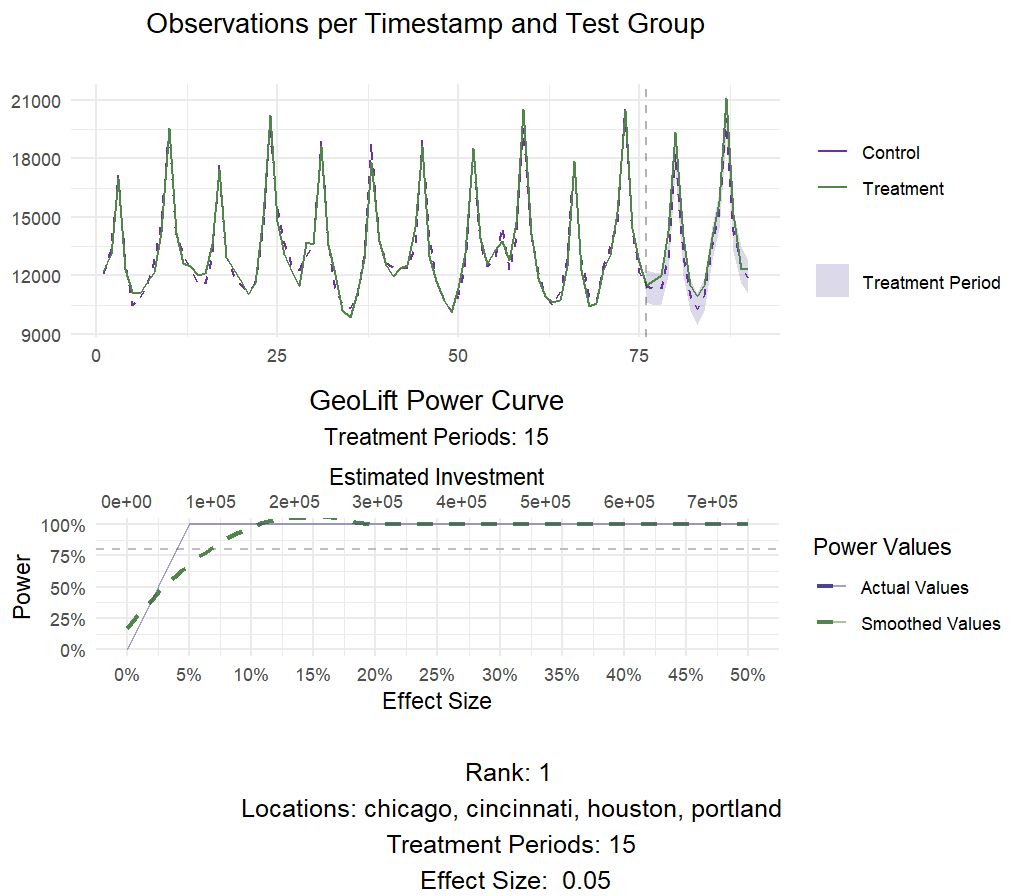

In [11]:
# Plot for atlanta, chicago, las vegas and saint paul for a 15 day test
GeoLiftPlot(func = GeoLift.plot_GeoLiftMarketSelection,
            x = MarketSelections,
            market_ID = 1, 
            print_summary = False)

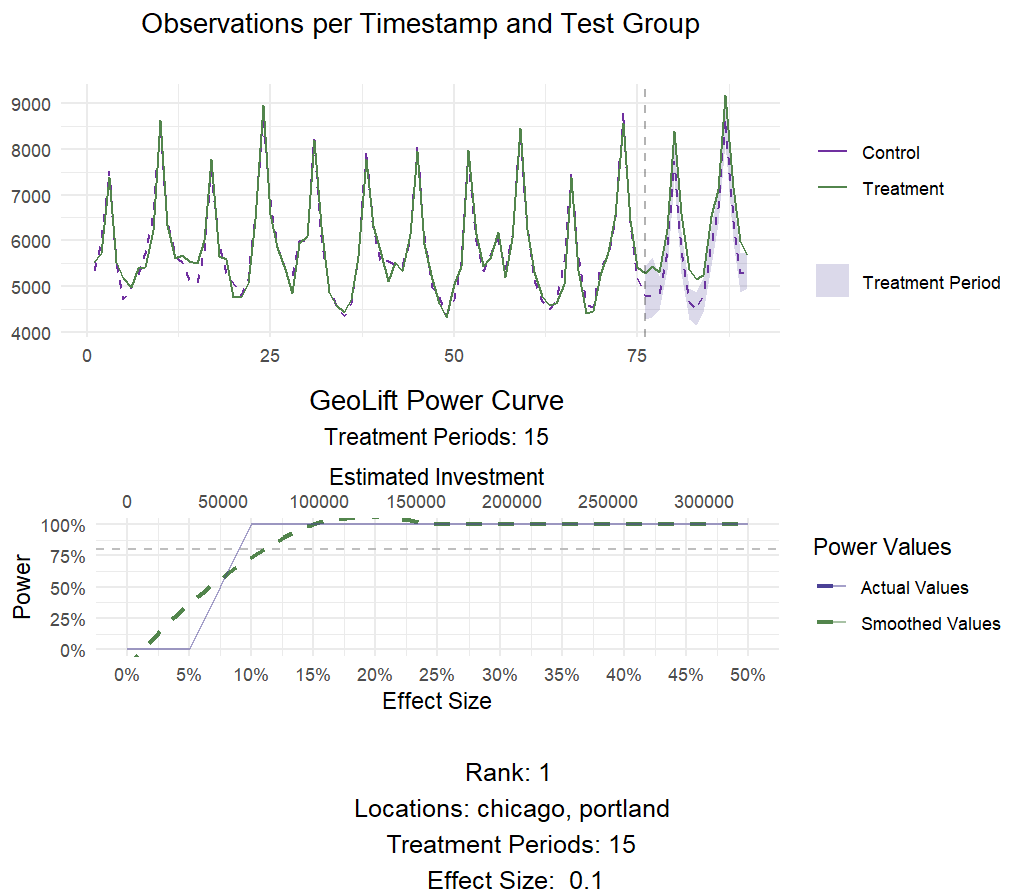

In [19]:
# Plot for chicago and porland for a 15 day test
GeoLiftPlot(func = GeoLift.plot_GeoLiftMarketSelection,
            x = MarketSelections,
            market_ID = 2, 
            print_summary = False)

### Power output - deep dive into power curves

In order to ensure that power is consistent throughout time for these locations, we can run more than 1 simulation for each of the top contenders that came out of `GeoLiftMarketSelection`.

We will do this by running the `GeoLiftPower` method and expanding our `lookback_window` to 10 days, only for this treatment combination and plot their results.

**NOTE: You could repeat this process for the top 5 treatment combinations that come out of GeoLiftMarketSelection, with increased lookback windows and compare their power curves. We will do it only for Chicago and Portland here.**

In [21]:
power_data = GeoLift.GeoLiftPower(data = GeoTestData_PreTest,
                                    locations = StrVector(['chicago', 'portland']),
                                    effect_size = r.seq(-0.25, 0.25, 0.01),
                                    lookback_window = 10,
                                    treatment_periods = 15,
                                    cpic = 7.5,
                                    side_of_test = "two_sided")

R[write to console]: Setting up cluster.

R[write to console]: Importing functions into cluster.

R[write to console]: Calculating Power for the following treatment group: chicago; portland.



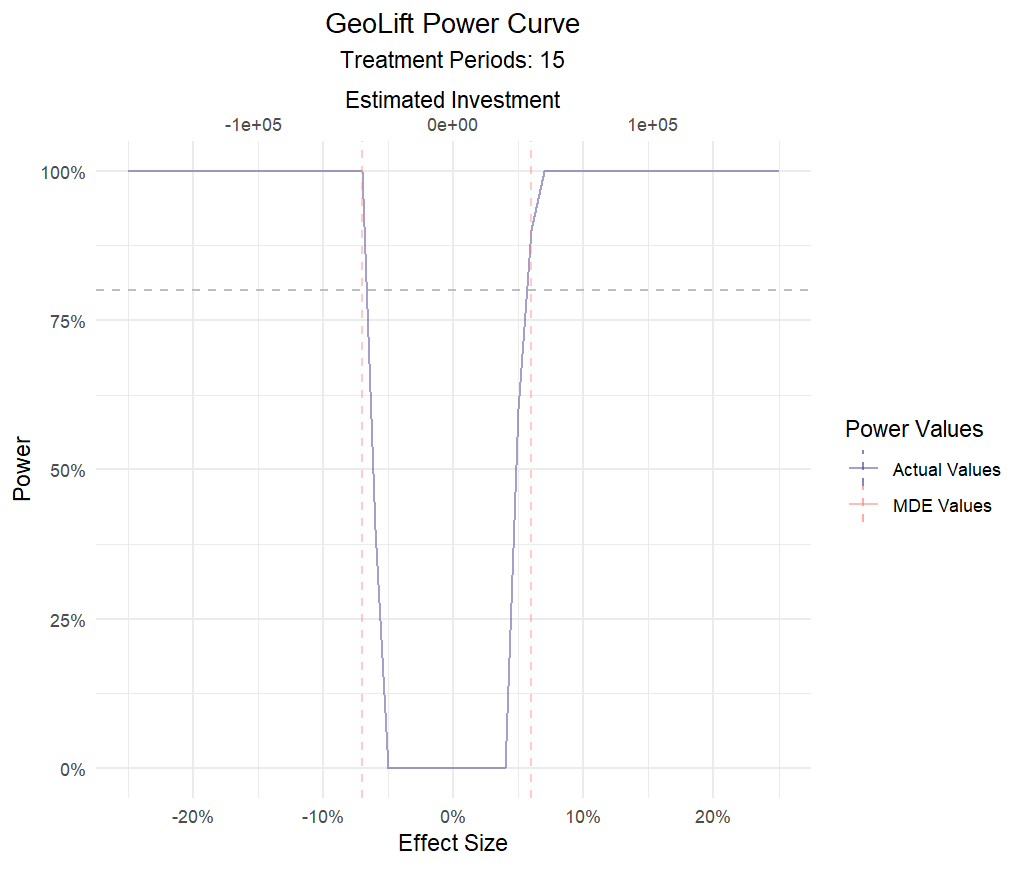

In [22]:
GeoLiftPlot(func = GeoLift.plot_GeoLiftPower,
            x = power_data, 
            show_mde = True, 
            smoothed_values = False, 
            breaks_x_axis = 5)    

While both market selections perform excellent on all metrics, we will move further with the latter since it allows us to run a successful test with a smaller budget. Also, the power curve is symmetrical with respect to the y axis, it has no power when the true effect is zero, and has a similar behavior with more simulations. Finally, changing the `print_summary` parameter of `GeoLiftPlot` to `True` can provide us with additional information about this market selection.

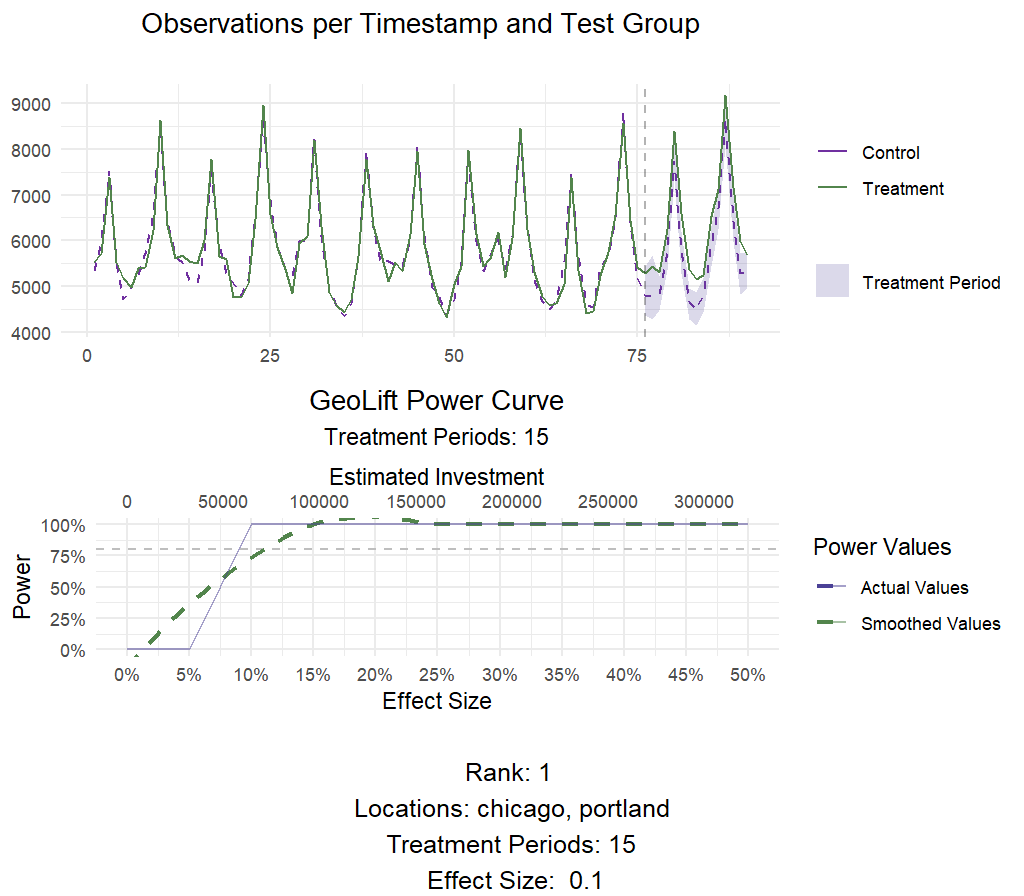

In [23]:
# Plot for chicago and porland for a 15 day test
GeoLiftPlot(func = GeoLift.plot_GeoLiftMarketSelection,
            x = MarketSelections,
            market_ID = 2, 
            print_summary = False)

**Note: Given that we are not using the complete pre-treatment data to calculate the weights in our power analysis simulations, the ones displayed by the plotting function above are not the final values. However, you can easily obtain them with the `GetWeights()`.**

In [24]:
weights = GeoLift.GetWeights(data = GeoTestData_PreTest,
                             Y_id = "Y",
                             location_id = "location",
                             time_id = "time",
                             locations = StrVector(['chicago', 'portland']),
                             pretreatment_end_time = 90,
                             fixed_effects = True)

R[write to console]: One outcome and one treatment time found. Running single_augsynth.



You can check the top weights by converting `weights` to pandas as shown below.

In [25]:
weights_pd = ConvertDf(df = weights, conv_type= "ToPandas")

# Top weights
weights_pd.sort_values(['weight'], axis=0, ascending=False).head()

,location,weight
6,cincinnati,0.227178
20,miami,0.202770
4,baton rouge,0.133537
22,minneapolis,0.089980
9,dallas,0.073923


## Example - Analyzing the Test Results

Based on the results of the Power Calculations, a test is set-up in which a //$65,000 and 15-day marketing campaign was executed in the cities of Chicago and Portland while the rest of the locations were put on holdout. Following the completion from this marketing campaign, we receive sales data that reflects these results. This new data-set contains the same format and information as the pre-test one but crucially includes results for the duration of the campaign. Depending on the vertical and product, adding a post-campaign cooldown period might be useful.

### Test Data

Data for the campaign results can be accessed at `GeoLift_Test` that you can find in the GeoLiftPython folder.



In [12]:
pd_GeoLift_Test = pd.read_csv("GeoLift_Test.csv")
pd_GeoLift_Test.head()

,location,Y,date
0,new york,3300,2021-01-01
1,new york,3202,2021-01-02
2,new york,4138,2021-01-03
3,new york,3716,2021-01-04
4,new york,3270,2021-01-05


To input the dataset in the GeoLift functions you need to convert it to a R dataframe using `ConvertDf()`. Then you can use `print()` to print the R dataframe in the screen.

In [13]:
GeoLift_Test = ConvertDf(pd_GeoLift_Test, conv_type = "ToR")

print(GeoLift_Test.head())

  location    Y       date
0 new york 3300 2021-01-01
1 new york 3202 2021-01-02
2 new york 4138 2021-01-03
3 new york 3716 2021-01-04
4 new york 3270 2021-01-05
5 new york 3260 2021-01-06



Similarly to the process executed at the beginning of the Power Analysis phase, we read the data into GeoLift’s format using the `GeoDataRead` function. You can observe in the summary output that additional 15 periods are contained in the new GeoLift data object.

In [14]:
GeoTestData_Test = GeoLift.GeoDataRead(data = GeoLift_Test,
                                       date_id = 'date',
                                       location_id = 'location',
                                       Y_id = 'Y',
                                       X = StrVector([]), #empty list as we have no covariates
                                       format = 'yyyy-mm-dd',
                                       summary = True)

R[write to console]: ##################################
#####       Summary       #####
##################################

* Raw Number of Locations: 40
* Time Periods: 105
* Final Number of Locations (Complete): 40



You can visualize in Pandas the dataframe formatted using `ConvertDf()`.

In [15]:
pd_GeoTestData_Test = ConvertDf(GeoTestData_Test, conv_type = "ToPandas")

pd_GeoTestData_Test.head()

,location,time,Y
1,atlanta,1,3384
2,atlanta,2,3904
3,atlanta,3,5734
4,atlanta,4,4311
5,atlanta,5,3686


The results can also be plotted by setting up the `func = GeoLift.GeoPlot` in the `GeoLiftPlot` function. However, for post-campaign data we can include the time-stamp at which the campaign started through the `treatment_start` parameter to clearly separate the two periods. Plotting the time-series is always useful to detect any anomalies with the data and to start noticing patterns with the test.

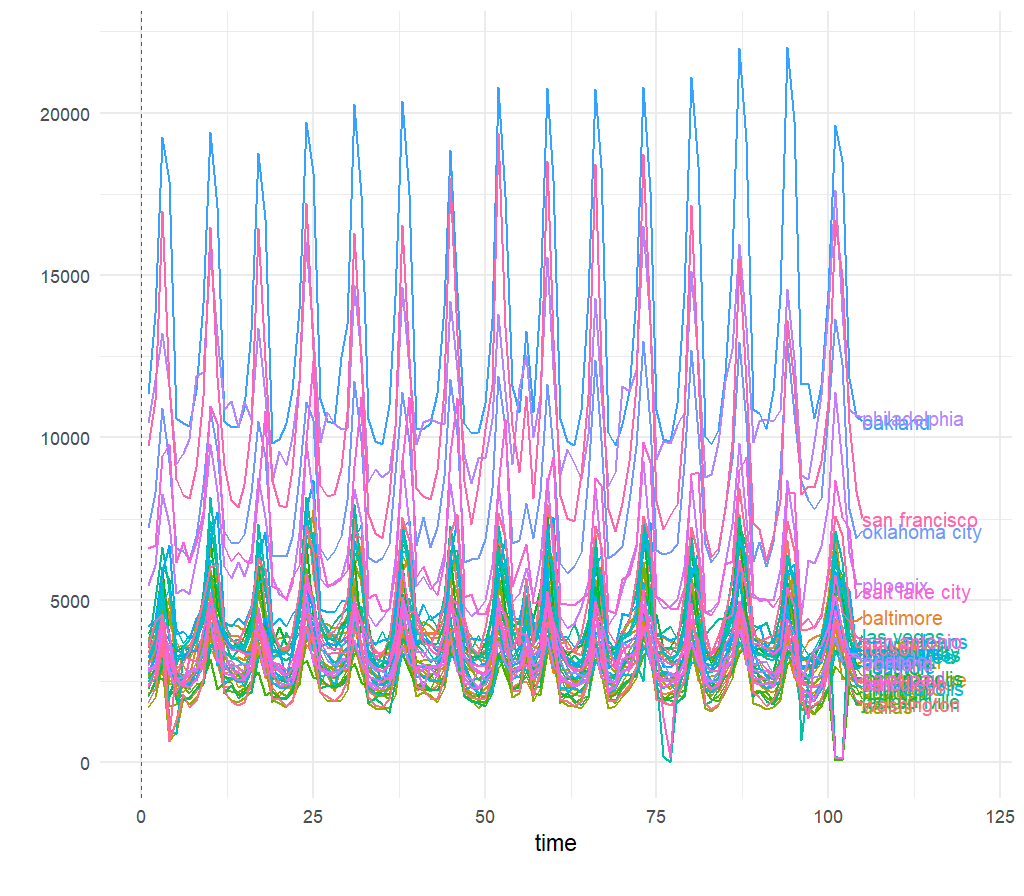

In [16]:
GeoLiftPlot(func = GeoLift.GeoPlot,
            data = GeoTestData_Test,
            Y_id = "Y",
            time_id = "time",
            location_id = "location")


### GeoLift Inference

The next step in the process is to calculate the actual Lift caused by the marketing campaigns on our test locations. To do so we make use of the `GeoLift()` function, which will take as input the GeoLift dataframe as well as information about the test such as which were the cities in the treatment group, when the test started, and when it ended through the `locations`, `treatment_start_time`, and `treatment_end_time` parameters respectively.

In [17]:
GeoTest = GeoLift.GeoLift(Y_id = "Y",
                          data = GeoTestData_Test,
                          locations = StrVector(['chicago', 'portland']),
                          treatment_start_time = 91,
                          treatment_end_time = 105)

To dig deeper into the results, we can run the `summary_GeoLift()` with `GeoLift` object as input.

In [18]:
p = GeoLift.summary_GeoLift(GeoTest)
print(p)

R[write to console]: 
GeoLift Results Summary


R[write to console]: ##################################
#####     Test Statistics    #####
##################################

* Average ATT: 155.556
* Percent Lift: 5.4%
* Incremental Y: 4667
* P-value: 0.01

##################################
#####   Balance Statistics   #####
##################################

* L2 Imbalance: 909.489
* Scaled L2 Imbalance: 0.1636
* Percent improvement from naive model: 83.64%
* Average Estimated Bias: NA

##################################
#####     Model Weights      #####
##################################

* Prognostic Function: NONE

* Model Weights:

R[write to console]:  * cincinnati: 0.2272

R[write to console]:  * miami: 0.2028

R[write to console]:  * baton rouge: 0.1335

R[write to console]:  * minneapolis: 0.09

R[write to console]:  * dallas: 0.0739

R[write to console]:  * nashville: 0.0685

R[write to console]:  * honolulu: 0.0673

R[write to console]:  * austin: 0.0465

R[write to conso

The results show that the campaigns led to a 5.4% lift in units sold corresponding to 4667 incremental units for this 15-day test. Moreover, the Average Estimated Treatment Effect is of 155.556 units every day of the test. Most importantly, we observe that these results are statistically significant at a 95% level. In fact, there’s only a 1.1% chance of observing an effect of this magnitude or larger if the actual treatment effect was zero. In other words, it is extremely unlikely that these results are just due to chance.

R[write to console]: You can include dates in your chart if you supply the end date of the treatment. Just specify the treatment_end_date parameter.



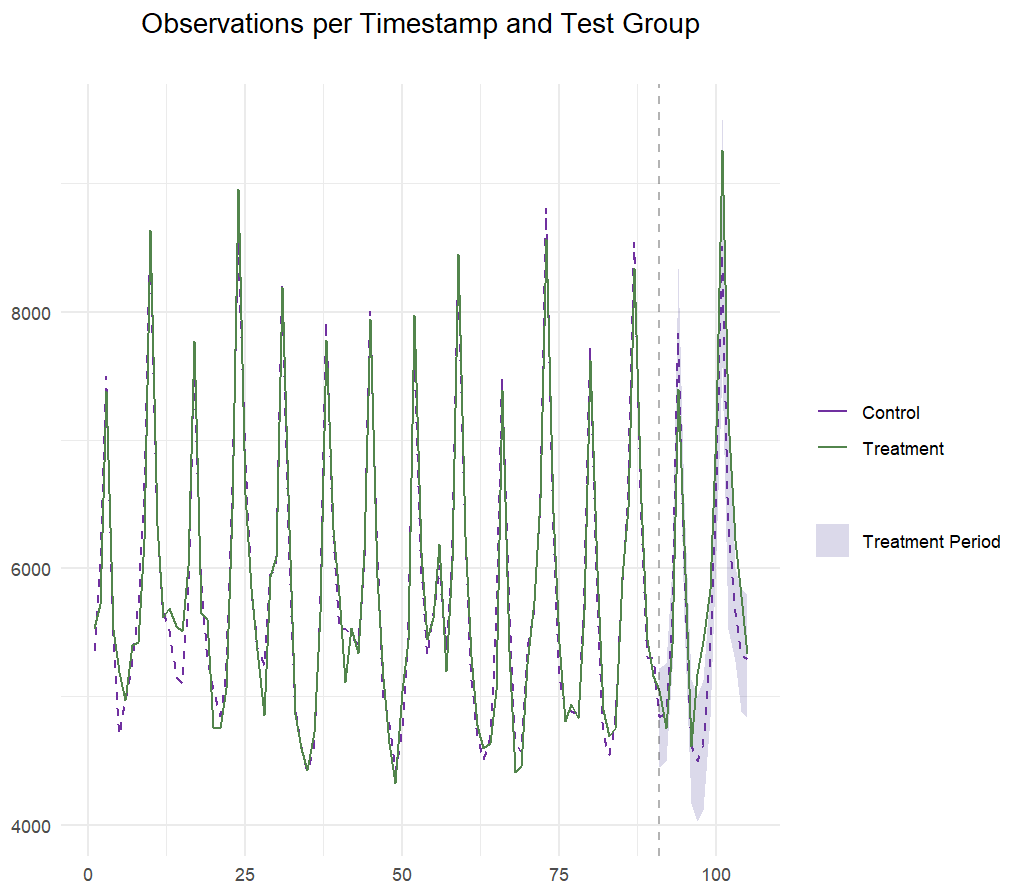

In [19]:
GeoLiftPlot(func = GeoLift.plot_GeoLift,
            x = GeoTest, 
            type = "Lift")

Plotting the results is a great way to assess the model’s fit and how effective the campaign was. Taking a close look at the pre-treatment period (period before the dotted vertical line) provides insight into how well our Synthetic Control Model fitted our data. In this specific example, we see that the observed values of the Chicago + Portland test represented in the solid black line were closely replicated by our SCM model shown as the dashed red line. Furthermore, looking at the test period, we can notice the campaign’s incrementality shown as the difference between the sales observed in the test markets and our counterfactual synthetic location. This marked difference between an almost-exact match in pre-treatment periods and gap in test time-stamps provides strong evidence of a successful campaign.

R[write to console]: You can include dates in your chart if you supply the end date of the treatment. Just specify the treatment_end_date parameter.



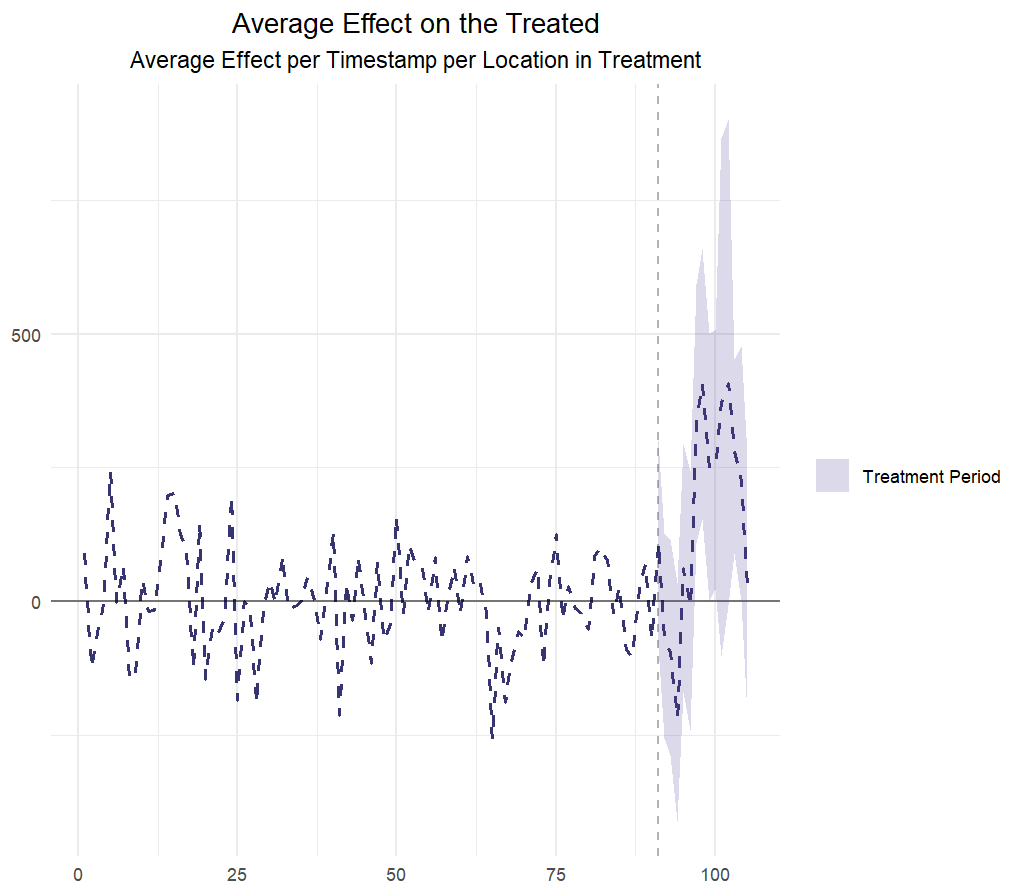

In [20]:
GeoLiftPlot(func = GeoLift.plot_GeoLift,
            x = GeoTest, 
            type = "ATT")

Looking at the Average Estimated Treatment Effect’s plot can also be extremely useful. The ATT metric shows us the magnitude of the Average Treatment Effect on a daily basis in contrast with the previous (Lift) plot which focused on aggregated effects. Moreover, this is a great example of a good GeoLift model as it has very small ATT values in the pre-treatment period and large ones when the treatment is administered to our test locations. Moreover, point-wise confidence intervals are included in this chart which help us measure how significant each day’s Lift has been.

### Improving The Model


In [21]:
GeoTestBest = GeoLift.GeoLift(Y_id = "Y",
                              data = GeoTestData_Test,
                              locations = StrVector(['chicago', 'portland']),
                              treatment_start_time = 91,
                              treatment_end_time = 105,
                              model = "best")

R[write to console]: Selected Ridge as best model.



In [22]:
p = GeoLift.summary_GeoLift(GeoTestBest)
print(p)

R[write to console]: 
GeoLift Results Summary


R[write to console]: ##################################
#####     Test Statistics    #####
##################################

* Average ATT: 156.805
* Percent Lift: 5.5%
* Incremental Y: 4704
* P-value: 0.01

##################################
#####   Balance Statistics   #####
##################################

* L2 Imbalance: 903.525
* Scaled L2 Imbalance: 0.1626
* Percent improvement from naive model: 83.74%
* Average Estimated Bias: -1.249

##################################
#####     Model Weights      #####
##################################

* Prognostic Function: RIDGE

* Model Weights:

R[write to console]:  * cincinnati: 0.2273

R[write to console]:  * miami: 0.2029

R[write to console]:  * baton rouge: 0.1337

R[write to console]:  * minneapolis: 0.0901

R[write to console]:  * dallas: 0.0741

R[write to console]:  * nashville: 0.0687

R[write to console]:  * honolulu: 0.0674

R[write to console]:  * austin: 0.0467

R[write t

R[write to console]: You can include dates in your chart if you supply the end date of the treatment. Just specify the treatment_end_date parameter.



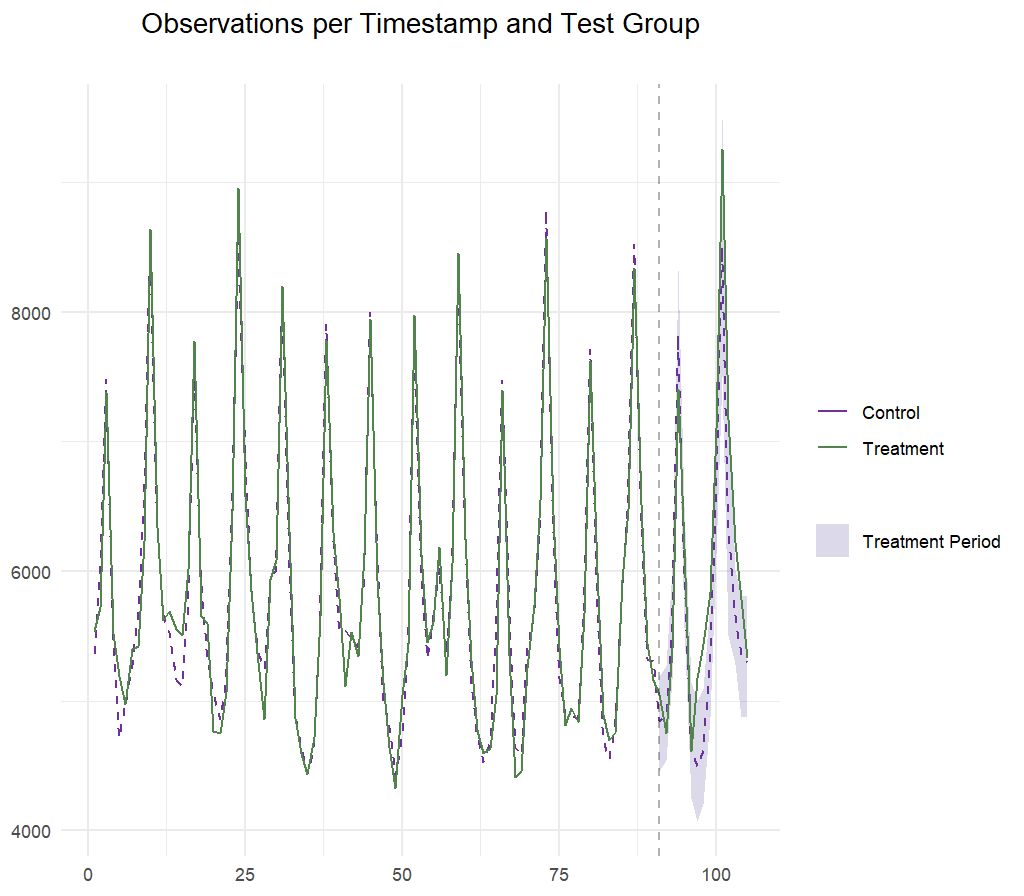

In [23]:
GeoLiftPlot(func = GeoLift.plot_GeoLift,
            x = GeoTestBest, 
            type = "Lift")

In [61]:
GeoLiftPlot(func = GeoLift.plot_GeoLift,
            x = GeoTestBest, 
            type = "ATT")

The new results augment the GeoLift model with a Ridge prognostic function which improves the model fit as seen in the new L2 Imbalance metrics. This additional robustness is translated in a small increase in the Percent Lift. Furthermore, by augmenting the model with a prognostic function, we have an estimate of the estimated bias that was removed by the Augmented Synthetic Control Model.

# GeoLift Multicell Walkthrough

### I. Determining the number of Cells

Figuring out how many cells will be measured in a GeoLift test is a crucial first step in the Multi-Cell process. Here, it is important to take into consideration that each cell will be measured by one or more test regions (city, state, DMA, etc.). Therefore, the total number of cells that can be measured with a GeoLift is bounded by the available data. Our recommendation is to be very conservative with the number of cells in a single
GeoLift study.

For this Walkthrough we will explore a cross-channel test to measure and compare the Lift of our largest Social Media and Paid Search channels. We will use the data included in the GeoLiftPython folder:

In [102]:
pd_GeoLift_PreTest = pd.read_csv("GeoLift_PreTest.csv")

# To input the dataset in the GeoLift functions you need to convert it to a R dataframe using ConvertDf()
GeoLift_PreTest = ConvertDf(pd_GeoLift_PreTest, conv_type = "ToR")


# Read into GeoLifts format with GeoDataRead
GeoTestData_PreTest = GeoLift.GeoDataRead(data = GeoLift_PreTest,
                                          date_id = "date",
                                          location_id = "location",
                                          Y_id = "Y",
                                          X = StrVector([]), #empty list as we have no covariates
                                          format = "yyyy-mm-dd",
                                          summary = True)



In [63]:
# Plot the KPI's historical values
GeoLiftPlot(func = GeoLift.GeoPlot,
            data = GeoTestData_PreTest,
            Y_id = "Y",
            time_id = "time",
            location_id = "location")

### II. Finding test markets with MultiCellMarketSelection

Once the number of cells, `k`, is determined, we can proceed to find the optimal test markets for each cell through `MultiCellMarketSelection()`. Relying on a sampling method defined by the user, the algorithm will create k similar groups. For each group, the algorithm will run a series of simulations to determine the best combinations of test and control locations.

In [64]:
set_seed = r('set.seed')
set_seed(8) #To replicate the results

Markets = GeoLift.MultiCellMarketSelection(data = GeoTestData_PreTest,
                                           k = 2,
                                           sampling_method = "systematic",
                                           top_choices = 10,
                                           N = IntVector([2, 3]),
                                           Y_id = "Y",
                                           location_id = "location",
                                           time_id = "time",
                                           effect_size = r.seq(0, 0.25, 0.025),
                                           treatment_periods = IntVector([15]),
                                           lookback_window = 1,
                                           cpic = IntVector([7, 7.50]),
                                           alpha = 0.1,
                                           model = "none",
                                           fixed_effects = True,
                                           Correlations = True,
                                           side_of_test = "one_sided")

You can visualize the best combinations converting the first position `[0]` of `Markets` using `ConvertDf()`.

In [103]:
Markets_TopChoices = ConvertDf(Markets[0], conv_type = "ToPandas")
    
Markets_TopChoices

The resulting table contains optimal test designs for this two-cell test as well as some model-fit metrics for each selection. 

Exploring the results of `MultiCellMarketSelection` we find that locations “chicago, cincinnati" for Cell 1 and “honolulu, indianapolis” in Cell 2 provide excelent values across all model-fit metrics such as a low EffectSize, small AvgScaledL2Imbalance, an abs_lift_in_zero close to zero, and a very similar value of ProportionTotal_Y.

We could define our Multi-Cell test markets as a list:

In [66]:
# Cell and Market IDs in a list
test_locs = ListVector({'cell_1': 1, 
                        'cell_2': 3}) 

Moreover, we could plot these results to observe how the model fits the historical data setting up `func = GeoLift.plot_MultiCellMarketSelection` in the `GeoLiftPlot()`.

In [67]:
GeoLiftPlot(func = GeoLift.plot_MultiCellMarketSelection,
            x = Markets, 
            test_markets = test_locs, 
            type = "Lift",
            stacked = True)
    

### III. Detailed Power Curves

Perhaps the most important piece of part of any Market Selection process is to obtain and analyze the test’s Power Curve. These curves tell us how sensible our test is at detecting a given Lift, it’s statistical power, and give us a good estimate of the necessary budget needed to run the Multi-Cell test. The `MultiCellPower` function can be used to calculate the Power Curves for a given set of cells through simulations on the historical data.

The `MultiCellPower` function is very easy to use as it will leverage the set-up and results we obtained from MultiCellMarketSelection. 

In [68]:
Power = GeoLift.MultiCellPower(x = Markets,
                               test_markets = test_locs,
                               effect_size = r.seq(-0.5, 0.5, 0.05),
                               lookback_window = 7)

Plotting the results shows the Power Curve for each cell. Set up `func = GeoLift.plot_MultiCellPower` in the `GeoLiftPlot()`.

In [69]:
GeoLiftPlot(func = GeoLift.plot_MultiCellPower,
            x = Power, 
            actual_values = True, 
            smoothed_values = False, 
            show_mde = True, 
            breaks_x_axis = 15, 
            stacked = True)

The plot shows that both Power Curves are ideal as they are: symmetric, centered at zero, and have relatively small effect sizes needed to accurately detect lift (~5%). Moreover, we observe that, despite different cpics, an investment of \\$50,000 per cell should be more than enough to achieve a significant Lift.

### III.a [Optional]: MultiCellWinner

While most of the times the objective of a Multi-Cell test is simply to accurately measure the incremental effect of different channels/strategies, sometimes we want to go a step further and declare which one of the competing cells is statistically significantly better or worse than the others. In this case, we can use the `MultiCellWinner` function, to determine what must happen for a cell to be declared a **“Winner”**. This function works by answering the following question: for a given baseline Effect Size, how much better must the incremental Return on Ad Spend (iROAS) of a cell be so that it provides a statistically significantly better Lift overall?

In [70]:
Winners = GeoLift.MultiCellWinner(x = Power,
                                  effect_size = 0.1,
                                  geolift_type = "standard",
                                  ROAS = r.seq(1,10,0.5),
                                  alpha = 0.1,
                                  method = "conformal",
                                  stat_test = "Positive")

You can visualize the results from `MultiCellWinner` function by printing first position `[0]` of `Winners` with `print()`.

In [104]:
print(Winners[0])

These results show that Cell 1 would need to be 9x more effective than Cell 2 to be declared a **“Winner”**.

### IV. Campaign Execution

After successfully selecting the test markets with `MultiCellMarketSelection` and `MultiCellPower`, the campaigns can be executed. For this test we will run ads on Social Media for the cities of Chicago and Cincinnati (Cell 1), Paid Search ads for the cities of Honolulu and Indianapolis (Cell 2), and holdout the rest of the locations in our data-set for a 15-day test.

We can use the simulated Multi-Cell data included in the GeoLiftPython folder as follows:

In [105]:
pd_GeoLift_Test_MultiCell = pd.read_csv("GeoLift_Test_MultiCell.csv")
pd_GeoLift_Test_MultiCell.head()

To input the dataset in the GeoLift functions you need to convert it to a R dataframe using `ConvertDf()` setting up the `conv_type = "ToR"`. Then you can use `print()` to print the R dataframe in the screen.

In [106]:
GeoLift_Test_MultiCell = ConvertDf(pd_GeoLift_Test_MultiCell, conv_type = "ToR")

print(GeoLift_Test_MultiCell.head())

In [107]:
# Read test data
GeoTestData_Test = GeoLift.GeoDataRead(data = GeoLift_Test_MultiCell,
                                       date_id = 'date',
                                       location_id = 'location',
                                       Y_id = 'Y',
                                       X = StrVector([]), #empty list as we have no covariates
                                       format = 'yyyy-mm-dd',
                                       summary = True)

You can visualize in Pandas the dataframe formatted using `ConvertDf()`.

In [108]:
pd_GeoTestData_Test = ConvertDf(GeoTestData_Test, conv_type = "ToPandas")

pd_GeoTestData_Test.head()

In [79]:
# Plot the historical and test data
GeoLiftPlot(func = GeoLift.GeoPlot,
            data = GeoTestData_Test,
            treatment_start = 91)

### V. Multi-Cell Inference for GeoLift

The final step in the process is to calculate the Lift generated by our Social Media and Paid Search campaigns. We can leverage the `GeoLiftMultiCell` function to easily perform statistical inference on our test. 

In [80]:
# First we specify our test locations as a list
test_locations = ListVector({'cell_1': ListVector({'a': "chicago", 'b': "cincinnati"}),
                             'cell_2': ListVector({'a': "honolulu", 'b': "indianapolis"})
                            })

In [109]:
#Then, we run MultiCellResults
MultiCellResults = GeoLift.GeoLiftMultiCell(data = GeoTestData_Test,
                                            locations = test_locations,
                                            treatment_start_time = 91,
                                            treatment_end_time = 105,
                                            alpha = 0.1,
                                            model = "best",
                                            fixed_effects = True,
                                            ConfidenceIntervals = True,
                                            method = "conformal",
                                            stat_test = "Positive",
                                            winner_declaration = True)

In [110]:
print(MultiCellResults)

The results show that the Social Media campaign had a significant Lift equal to 22.8% while the Paid Search campaigns generated a 7.1% Lift. And while the results of the test show a higher Lift by Cell 1, the wide Confidence Intervals do not allow us to declare a winner at a 90% confidence level. We can dig deeper into the results through the `summary_GeoLiftMultiCell()` of our Multi-Cell GeoLift object. The `summary_GeoLiftMultiCell()` method has two options based on the table parameter:

1. If `table = TRUE` a summary table of the results per cell will be printed.

In [111]:
# Short summary of the results
GeoLift.summary_GeoLiftMultiCell(MultiCellResults, table = True)

2. If `table = FALSE` the complete summary method for each cell will be outputted.

In [112]:
# Deep dive into the results
GeoLift.summary_GeoLiftMultiCell(MultiCellResults, table = False)

Finally, we can plot the results to observe both the Lift and ATT plots.

In [86]:
GeoLiftPlot(func = GeoLift.plot_GeoLiftMultiCell,
            x = MultiCellResults, 
            type = "Lift", 
            stacked = True)


In [82]:
GeoLiftPlot(func = GeoLift.plot_GeoLiftMultiCell,
            x = MultiCellResults, 
            type = "ATT", 
            stacked = True)